Checking if processed data file exists...
Processed data found: C:\Users\yings\OneDrive\桌面\D100-D400_Project\data\processed_data.parquet

Loading and inspecting processed data...
Loaded processed data with shape: (1521, 13)

Summary statistics:
              Price         Year    Kilometer Fuel Type Transmission  \
count   1521.000000  1521.000000  1521.000000      1521         1521   
unique          NaN          NaN          NaN         7            2   
top             NaN          NaN          NaN    Petrol       Manual   
freq            NaN          NaN          NaN       757          966   
mean      13.575764     7.609588    10.657101       NaN          NaN   
std        0.707520     0.001593     0.765946       NaN          NaN   
min       11.170463     7.599401     4.330733       NaN          NaN   
25%       13.081543     7.608374    10.341775       NaN          NaN   
50%       13.493928     7.609862    10.829748       NaN          NaN   
75%       14.077876     7.610853   

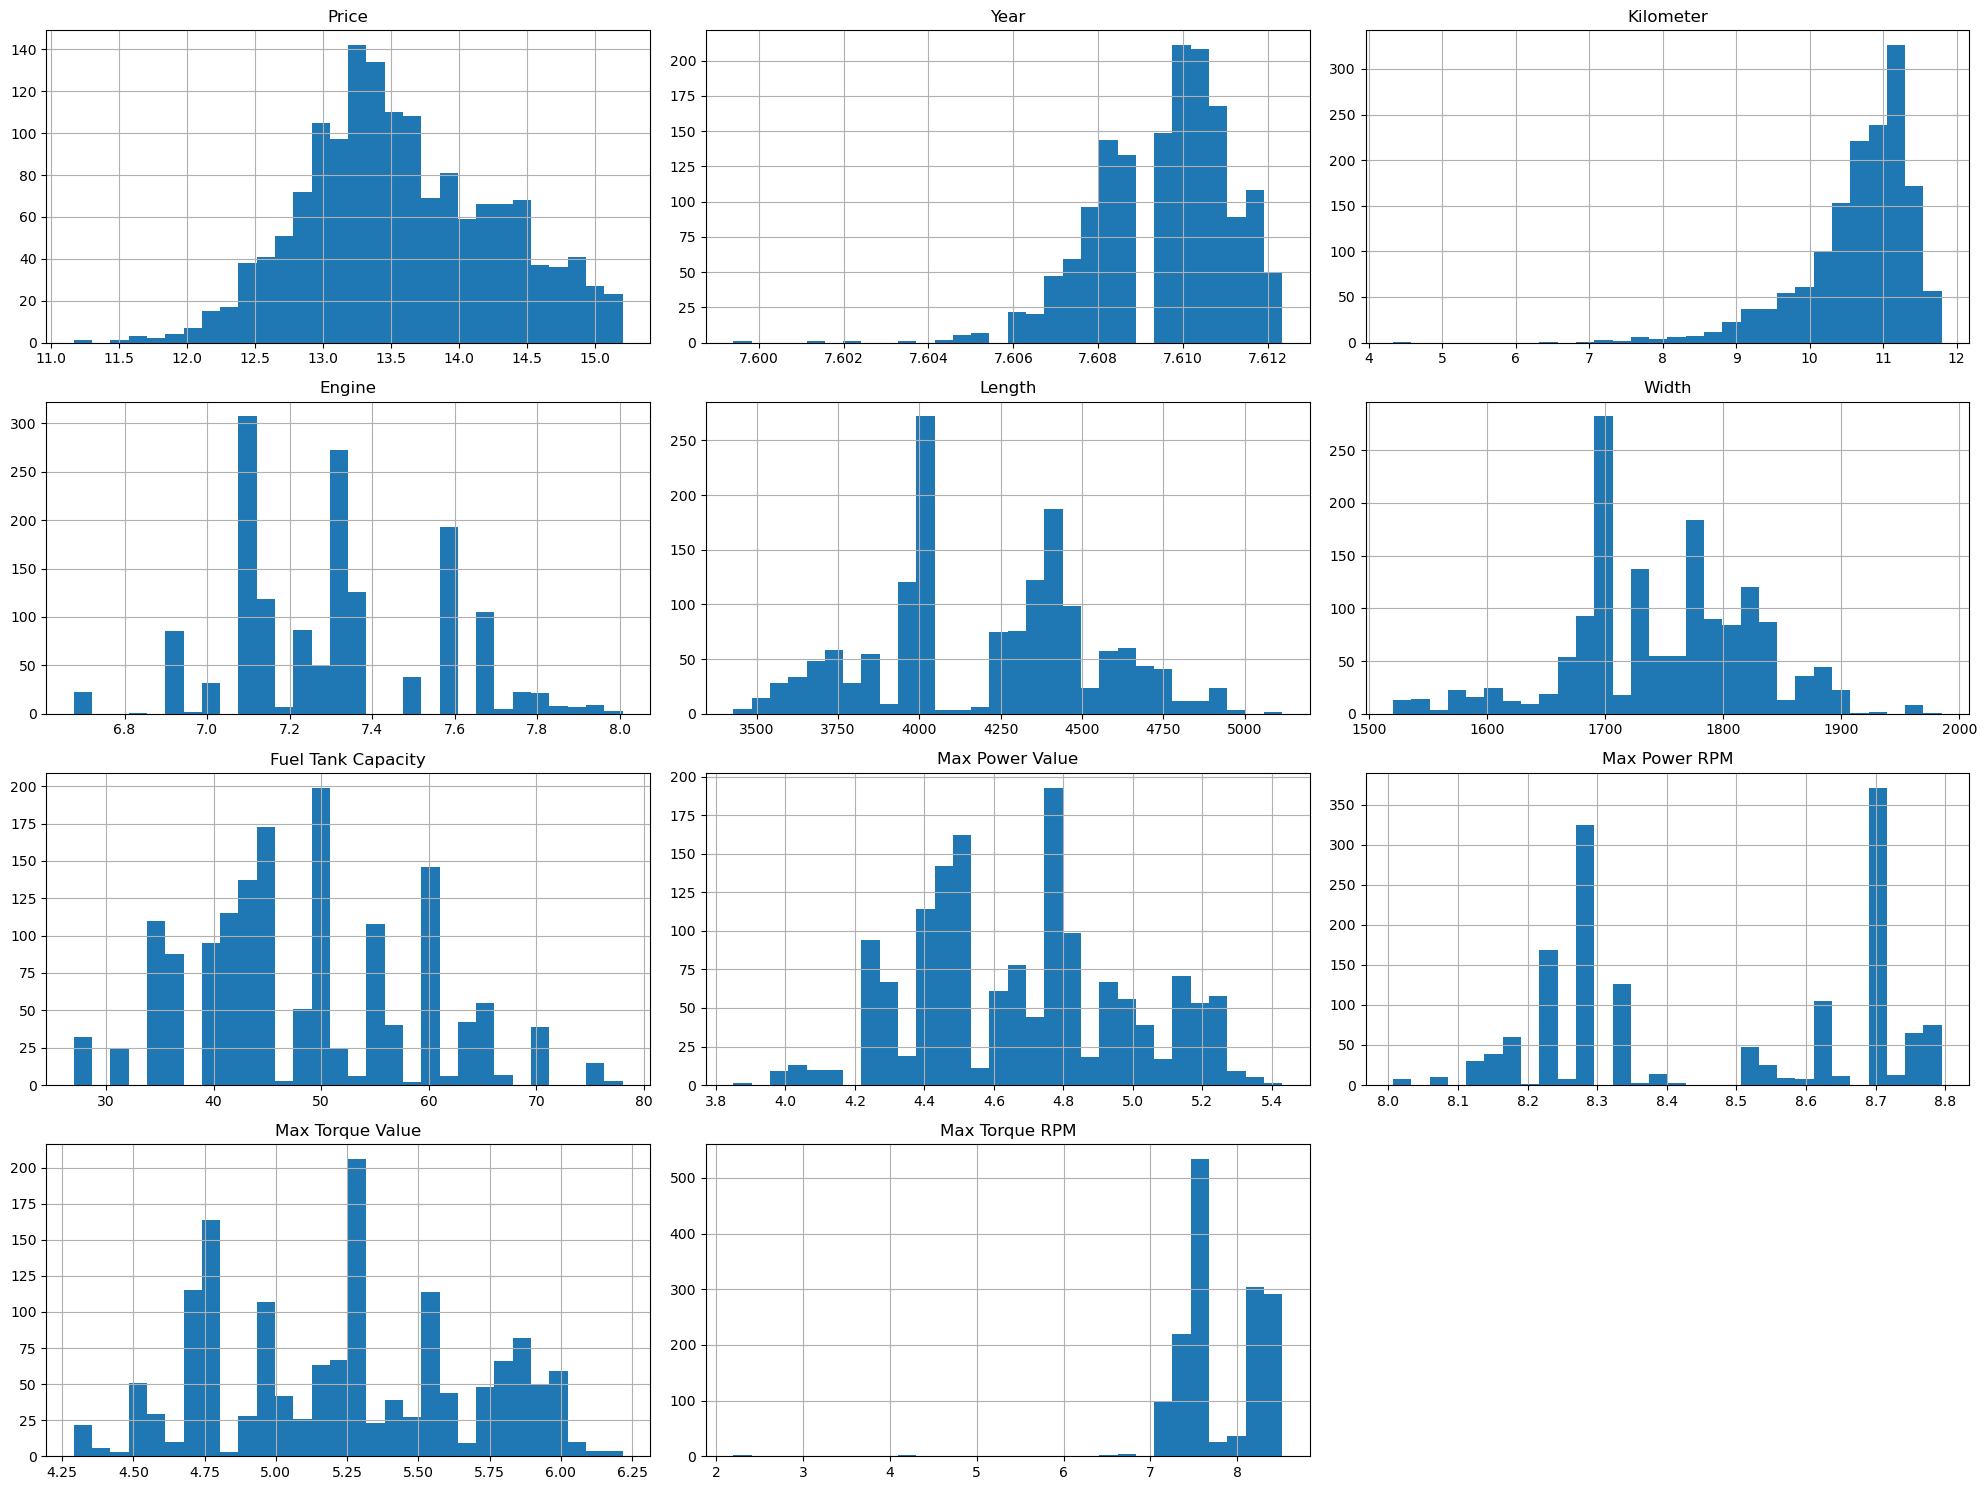


Splitting data into training and testing sets...
Saving split datasets...
Split datasets saved successfully.

Inspecting split datasets...
X_train shape: (1216, 12)
X_test shape: (305, 12)
y_train shape: (1216, 1)
y_test shape: (305, 1)

Visualizing target variable distributions...


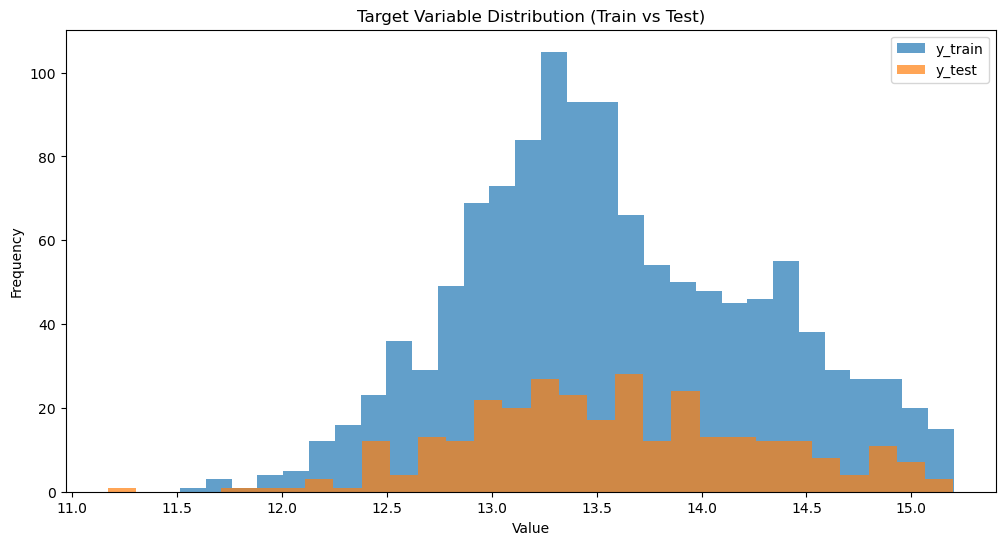

No null values detected in the split datasets.

Data loading and splitting script completed successfully.


In [3]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
project_root = Path().resolve().parent  
data_path = project_root / "data" / "processed_data.parquet"
output_dir = project_root / "data"

# Step 1: Check if the processed data file exists
print("Checking if processed data file exists...")
if data_path.exists():
    print(f"Processed data found: {data_path}")
else:
    raise FileNotFoundError(f"Processed data not found at {data_path}")

# Step 2: Load the processed data and inspect
print("\nLoading and inspecting processed data...")
try:
    df = pd.read_parquet(data_path)
    print(f"Loaded processed data with shape: {df.shape}")
    print("\nSummary statistics:")
    print(df.describe(include='all'))

    # Check for null values
    print("\nChecking for null values...")
    print(df.isnull().sum())

    # Check skewness of numerical features
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("\nSkewness of numerical features:")
    print(df[numeric_cols].skew())

    # Visualize feature distributions
    print("\nVisualizing feature distributions...")
    df.hist(bins=30, figsize=(20, 15))
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error loading or inspecting processed data:")
    print(e)
    raise

# Step 3: Split the data into training and testing sets
print("\nSplitting data into training and testing sets...")
from sklearn.model_selection import train_test_split

try:
    # Assuming "Price" is the target variable
    target = "Price"
    features = df.drop(columns=[target])
    target_values = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        features, target_values, test_size=0.2, random_state=42
    )

    # Save split data to files
    print("Saving split datasets...")
    X_train.to_parquet(output_dir / "X_train.parquet")
    X_test.to_parquet(output_dir / "X_test.parquet")
    y_train.to_frame().to_parquet(output_dir / "y_train.parquet")
    y_test.to_frame().to_parquet(output_dir / "y_test.parquet")

    print("Split datasets saved successfully.")

except Exception as e:
    print("Error during train-test split:")
    print(e)
    raise

# Step 4: Inspect split data
print("\nInspecting split datasets...")
try:
    # Reload split data for validation
    X_train = pd.read_parquet(output_dir / "X_train.parquet")
    X_test = pd.read_parquet(output_dir / "X_test.parquet")
    y_train = pd.read_parquet(output_dir / "y_train.parquet")
    y_test = pd.read_parquet(output_dir / "y_test.parquet")

    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    # Visualize target variable distribution in training and testing sets
    print("\nVisualizing target variable distributions...")
    plt.figure(figsize=(12, 6))
    plt.hist(y_train.values.ravel(), bins=30, alpha=0.7, label="y_train")
    plt.hist(y_test.values.ravel(), bins=30, alpha=0.7, label="y_test")
    plt.title("Target Variable Distribution (Train vs Test)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Check for null values
    assert not X_train.isnull().values.any(), "Null values found in X_train"
    assert not X_test.isnull().values.any(), "Null values found in X_test"
    assert not y_train.isnull().values.any(), "Null values found in y_train"
    assert not y_test.isnull().values.any(), "Null values found in y_test"
    print("No null values detected in the split datasets.")

except Exception as e:
    print("Error loading or validating split datasets:")
    print(e)
    raise

print("\nData loading and splitting script completed successfully.")
